In [1]:
import pandas as pd

df_data = pd.read_csv("./dataset_phishing_1.csv")
df_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,label
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,1,0,45,-1,0,1,1,4,legitimate,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,0,0,77,5767,0,0,1,2,phishing,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,0,0,14,4004,5828815,0,1,0,phishing,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,0,0,62,-1,107721,0,0,3,legitimate,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,1,0,224,8175,8725,0,0,6,legitimate,0


In [2]:
from sklearn.model_selection import train_test_split

#Train & Test Set
X= df_data.iloc[: , 1:-2]
y= df_data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=85)
print("\n--Training data samples--")
print(X_train.shape)


--Training data samples--
(8572, 87)


In [3]:
X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6


In [4]:
input_shape = X_train.shape[1]

In [5]:
#ANN
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, input_dim = input_shape, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               45056     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 308,225
Trainable params: 308,225
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [7]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.01,
    restore_best_weights=True,
)
fit_history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
17/17 [==============================] - 1s 19ms/step - loss: 25162.2285 - binary_accuracy: 0.5393 - val_loss: 8472.6260 - val_binary_accuracy: 0.5493
Epoch 2/200
17/17 [==============================] - 0s 12ms/step - loss: 11662.5312 - binary_accuracy: 0.5955 - val_loss: 2009.9886 - val_binary_accuracy: 0.6197
Epoch 3/200
17/17 [==============================] - 0s 12ms/step - loss: 6782.1343 - binary_accuracy: 0.6099 - val_loss: 5333.7095 - val_binary_accuracy: 0.6074
Epoch 4/200
17/17 [==============================] - 0s 12ms/step - loss: 4537.6748 - binary_accuracy: 0.6237 - val_loss: 4151.6104 - val_binary_accuracy: 0.6421
Epoch 5/200
17/17 [==============================] - 0s 12ms/step - loss: 3261.9521 - binary_accuracy: 0.6402 - val_loss: 1922.6490 - val_binary_accuracy: 0.5962
Epoch 6/200
17/17 [==============================] - 0s 12ms/step - loss: 2180.6277 - binary_accuracy: 0.6441 - val_loss: 921.2704 - val_binary_accuracy: 0.6137
Epoch 7/200
17/17 [========

Epoch 53/200
17/17 [==============================] - 0s 13ms/step - loss: 0.8707 - binary_accuracy: 0.7759 - val_loss: 0.4620 - val_binary_accuracy: 0.7680
Epoch 54/200
17/17 [==============================] - 0s 13ms/step - loss: 2.2428 - binary_accuracy: 0.7808 - val_loss: 0.4536 - val_binary_accuracy: 0.7778
Epoch 55/200
17/17 [==============================] - 0s 13ms/step - loss: 1.9844 - binary_accuracy: 0.7750 - val_loss: 0.4536 - val_binary_accuracy: 0.7768
Epoch 56/200
17/17 [==============================] - 0s 14ms/step - loss: 1.2588 - binary_accuracy: 0.7748 - val_loss: 0.4537 - val_binary_accuracy: 0.7743
Epoch 57/200
17/17 [==============================] - 0s 13ms/step - loss: 1.1546 - binary_accuracy: 0.7772 - val_loss: 0.4557 - val_binary_accuracy: 0.7764
Epoch 58/200
17/17 [==============================] - 0s 16ms/step - loss: 0.6249 - binary_accuracy: 0.7759 - val_loss: 0.4481 - val_binary_accuracy: 0.7775
Epoch 59/200
17/17 [==============================] - 0s 1

In [8]:
print('Accuracy: %.4f '%(model.evaluate(X_test, y_test)[1]))

90/90 [==============================] - 0s 1ms/step - loss: 0.4330 - binary_accuracy: 0.7827
Accuracy: 0.7827 


In [9]:
fit_history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

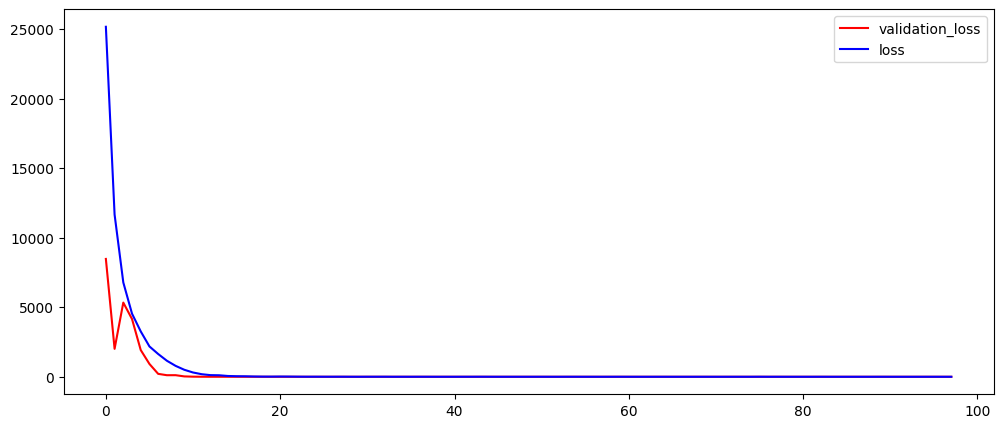

In [10]:
import matplotlib.pyplot as plt
import numpy as np
#그래프로 확인
vloss = fit_history.history['val_loss']   #테스트 셋 Loss
loss = fit_history.history['loss']   #학습셋

plt.figure(figsize = (12, 5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, 'r', label='validation_loss')
plt.plot(epoch, loss, 'b', label='loss')
plt.legend(loc='best')
plt.show()

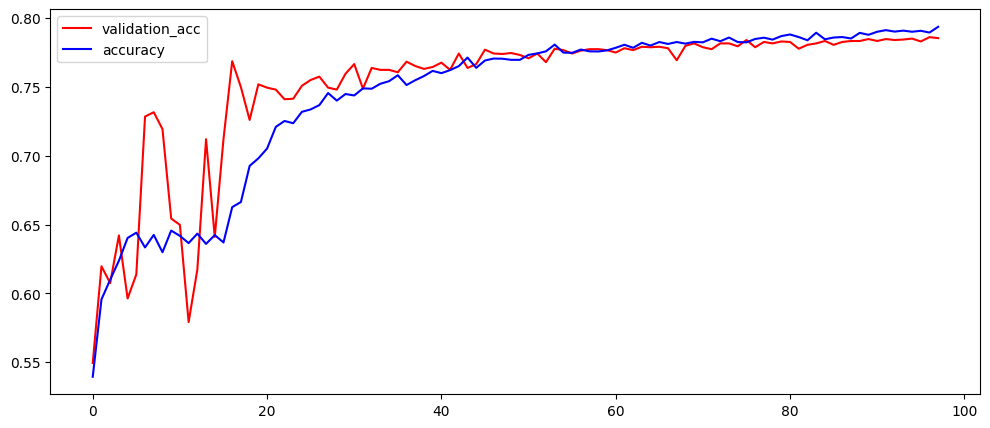

In [11]:
vacc = fit_history.history['val_binary_accuracy']
acc = fit_history.history['binary_accuracy']

plt.figure(figsize = (12, 5))
epoch = np.arange(len(loss))
plt.plot(epoch, vacc, 'r', label='validation_acc')
plt.plot(epoch, acc, 'b', label='accuracy')
plt.legend(loc='best')
plt.show()